In [85]:

import pymysql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from PIL import Image, ImageDraw, ImageFont
from urllib.parse import quote 

In [86]:
engine = create_engine(
      "mysql+pymysql://root:%s@localhost/fobos" % quote('118378bdmy@L'))
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='118378bdmy@L',db='fobos')


In [87]:
query = """SELECT 
    CONCAT(WEEK(s.STAT_DT_DATE), " - ", MONTH(s.STAT_DT_DATE), "/", year(s.STAT_DT_DATE)) AS 'SEMANA'
    , SUM(s.STAT_NR_VALUE) AS 'SOMATÓRIO'
    FROM fobos.fobo_tb_statements s where 
  s.STAT_NM_NAME NOT LIKE '%%PAGAMENTO FATURA INTER%%'
  AND s.STAT_NR_VALUE < 0
  GROUP BY CONCAT(WEEK(s.STAT_DT_DATE), " - ", MONTH(s.STAT_DT_DATE), "/", year(s.STAT_DT_DATE))
  ORDER BY s.STAT_DT_DATE"""
df = pd.read_sql(query, engine)
df = df.tail(20)



In [88]:
media_gastos = round(df['SOMATÓRIO'].mean(), 2) * -1
media_gastos

1823.89

In [94]:
#df["STAT_DT_DATE"] = pd.to_datetime(df["STAT_DT_DATE"]).dt.strftime("%m/%Y")
list_gastos = []
for index, row in df.iterrows():
  if(row['SOMATÓRIO'] * -1 < media_gastos):
    list_gastos.append(row['SOMATÓRIO'])

list_gastos
media_de_gastos_sem_pico = round(((sum(list_gastos) / len(list_gastos)) * -1), 2)
media_de_gastos_sem_pico


852.93

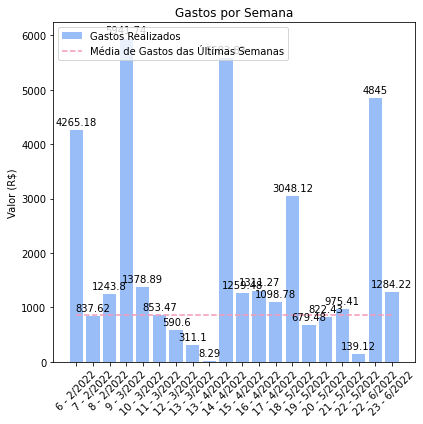

In [95]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('Gastos por Semana')
ax.set_ylabel("Valor (R$)")

media = []
for i in range(df['SEMANA'].size):
     media.append(media_de_gastos_sem_pico)

bar = ax.bar(df['SEMANA'], df['SOMATÓRIO'] * -1, color='#99bdf7', label='Gastos Realizados')
line_avg = ax.plot(df['SEMANA'], media, linestyle='--',  color='#f799b5', label='Média de Gastos das Últimas Semanas')
##line_avg_2022 = ax.plot(df['STAT_DT_DATE'], df['AVG_2022'] * -1, 'g--', color='#c8f799', label='Média 2022')

ax.bar_label(bar, padding=3)

ax.legend(handles=[bar, line_avg[0]], loc='upper left')
plt.xticks(df['SEMANA'], rotation=45)
plt.tight_layout()
plt.savefig('graph_weekly.png',dpi=300, facecolor='white', bbox_inches="tight")

In [91]:
text_resume = """
MÉDIA DE GASTOS SEMANAIS É DE %s reais
"""

text = text_resume % (media_de_gastos_sem_pico)

font_family = "arial.ttf"
width_ratio = 0.5

im_graph = Image.open("graph_weekly.png")
im_graph_size = im_graph.size


In [92]:
text_image = Image.new('RGB', (im_graph_size[0], 400), color ='#f799b5')
font = ImageFont.truetype(font_family, 40)

d = ImageDraw.Draw(text_image)
d.text((30,30), text, fill=(0,0,0), font=font)

text_image.save('text_weekly.png')

In [93]:
im_text = Image.open("text_weekly.png")
im_text_size = im_text.size

new_im = Image.new('RGB', (im_graph_size[0], + im_text_size[1] + im_graph_size[1]), (250,250,250))

new_im.paste (im_graph, (0,0))
new_im.paste(im_text, (0, im_graph_size[1]))

new_im.save("weekly.png", "PNG")